In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shraddha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data=pd.read_csv('singapore_airlines_reviews.csv')

In [54]:
data.index.name='id'

In [55]:
data

,published_date,published_platform,rating,type,text,title,helpful_votes,length
id,,,,,,,,
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,1352
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,4666
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,420
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,144
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,582
...,...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,208
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1,161
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1,319


In [5]:
data.shape

(10000, 7)

In [6]:
data.isnull().sum()

published_date        0
published_platform    0
rating                0
type                  0
text                  0
title                 1
helpful_votes         0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

published_date        0
published_platform    0
rating                0
type                  0
text                  0
title                 0
helpful_votes         0
dtype: int64

In [9]:
data.iloc[10]

published_date                                2024-03-07T19:47:40-05:00
published_platform                                              Desktop
rating                                                                1
type                                                             review
text                  Singapore Airlines (SQ), may be one of the lar...
title                                               Very disappointed !
helpful_votes                                                         1
Name: 10, dtype: object

In [10]:
data['length']=data['text'].apply(len)

In [11]:
data.iloc[10]

published_date                                2024-03-07T19:47:40-05:00
published_platform                                              Desktop
rating                                                                1
type                                                             review
text                  Singapore Airlines (SQ), may be one of the lar...
title                                               Very disappointed !
helpful_votes                                                         1
length                                                              651
Name: 10, dtype: object

In [12]:
data.dtypes


published_date        object
published_platform    object
rating                 int64
type                  object
text                  object
title                 object
helpful_votes          int64
length                 int64
dtype: object

In [13]:
###Exploratory Data Analysis
len(data)

9999

<Axes: xlabel='rating'>

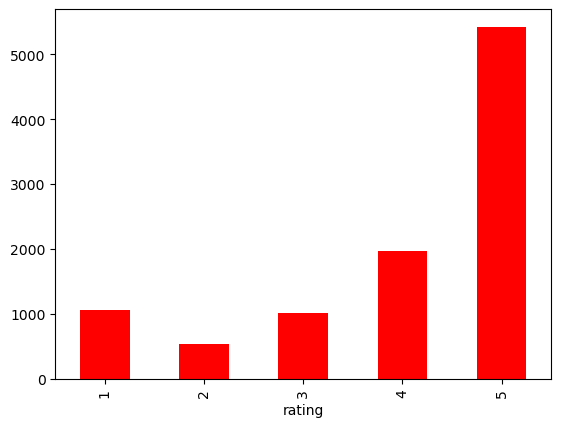

In [14]:
data.rating.value_counts().sort_index().plot(kind='bar',color='red')

In [19]:
example=data.iloc[5,4]

In [22]:
tokens=nltk.word_tokenize(example)
tokens[0:10]

['We', 'booked', 'our', 'flights', 'a', 'full', '9', 'months', 'in', 'advance']

In [25]:
tagged=nltk.pos_tag(tokens)

In [28]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  booked/VBD
  our/PRP$
  flights/NNS
  a/DT
  full/JJ
  9/CD
  months/NNS
  in/IN
  advance/NN
  and/CC
  paid/VBN
  well/RB
  over/IN
  $/$
  11,000/CD
  for/IN
  a/DT
  trip/NN
  in/IN
  2/CD
  weeks/NNS
  time/NN
  ./.
  we/PRP
  then/RB
  booked/VBD
  our/PRP$
  trip/NN
  around/IN
  the/DT
  flights/NNS
  ./.
  Over/IN
  the/DT
  past/JJ
  2/CD
  months/NNS
  they/PRP
  changed/VBD
  our/PRP$
  flights/NNS
  over/IN
  6/CD
  times/NNS
  resulting/VBG
  in/IN
  over/IN
  15/CD
  hours/NNS
  of/IN
  stop/JJ
  overs/NNS
  and/CC
  delays/NNS
  ,/,
  making/VBG
  the/DT
  trip/NN
  almost/RB
  32/CD
  hours/NNS
  long/RB
  ./.
  We/PRP
  booked/VBD
  through/IN
  flight/NN
  centre/NN
  and/CC
  paid/VBD
  the/DT
  extra/JJ
  to/TO
  be/VB
  able/JJ
  to/TO
  cancel/VB
  the/DT
  flights/NNS
  ./.
  Now/RB
  we/PRP
  're/VBP
  having/VBG
  to/TO
  fight/VB
  tooth/NN
  and/CC
  nail/NN
  just/RB
  to/TO
  get/VB
  a/DT
  response/NN
  let/NN
  alone/RB
  our/PRP$
  money/

In [29]:
###VADER-sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [56]:
vaders

,neg,neu,pos,compound
id,,,,
0,0.019,0.871,0.109,0.9781
1,0.023,0.903,0.075,0.9935
2,0.033,0.882,0.086,0.4588
3,0.000,0.496,0.504,0.9601
4,0.100,0.854,0.046,-0.7177
...,...,...,...,...
9995,0.000,0.659,0.341,0.9324
9996,0.000,0.572,0.428,0.9349
9997,0.000,0.643,0.357,0.9779


In [33]:
sia.polarity_scores('I am not feeling good!')

{'neg': 0.67, 'neu': 0.33, 'pos': 0.0, 'compound': -0.471}

In [35]:
sia.polarity_scores(example)

{'neg': 0.091, 'neu': 0.856, 'pos': 0.052, 'compound': -0.6445}

In [45]:
###run polarity score on everything
res={}
for i,row in (data.iterrows()):
    text=row['text']
    myid=i
    res[myid]=sia.polarity_scores(text)
    

In [58]:
vaders=pd.DataFrame(res).T
vaders.index.name='id'
vaders=vaders.merge(data,how='right',left_index=True, right_index=True)

In [60]:
vaders

,neg,neu,pos,compound,published_date,published_platform,rating,type,text,title,helpful_votes,length
id,,,,,,,,,,,,
0,0.019,0.871,0.109,0.9781,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,1352
1,0.023,0.903,0.075,0.9935,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,4666
2,0.033,0.882,0.086,0.4588,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,420
3,0.000,0.496,0.504,0.9601,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,144
4,0.100,0.854,0.046,-0.7177,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,582
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000,0.659,0.341,0.9324,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,208
9996,0.000,0.572,0.428,0.9349,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1,161
9997,0.000,0.643,0.357,0.9779,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1,319


In [147]:
###find a pattern in data
###POSITIVE NEUTRAL NEGATIVE REVIEWS
data['distribute']=np.where(data.rating>3,1,0)

In [148]:
data.columns

Index(['published_date', 'published_platform', 'rating', 'type', 'text',
       'title', 'helpful_votes', 'length', 'distribute'],
      dtype='object')

<Axes: xlabel='rating', ylabel='length'>

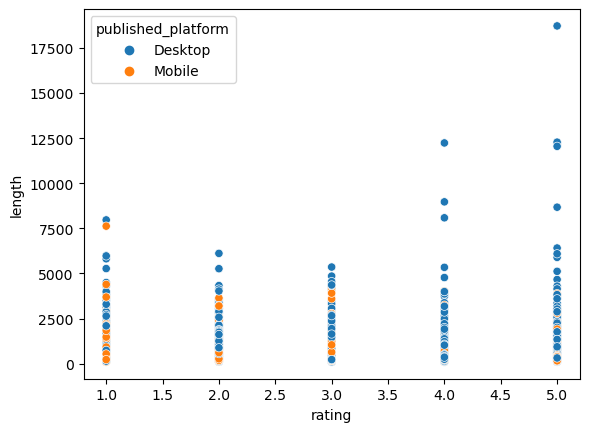

In [149]:
sns.scatterplot(x='rating',y='length',data=data,hue='published_platform')

In [150]:
data.iloc[5,4]

"We booked our flights a full 9 months in advance and paid well over $11,000 for a trip in 2 weeks time. we then booked our trip around the flights. Over the past 2 months they changed our flights over 6 times resulting in over 15 hours of stop overs and delays, making the trip almost 32 hours long.\nWe booked through flight centre and paid the extra to be able to cancel the flights.\nNow we're having to fight tooth and nail just  to get a response let alone our money back. \nWe're now at the unenvious point of paying for litigation to reclaim our funds that they have had for 9 months to use as they wish.\nI have flown well over 30 times with this airline and our business and family hundreds of times but this is the end of our relationship and we will never fly or recommend them again.\nSuch poor integrity."

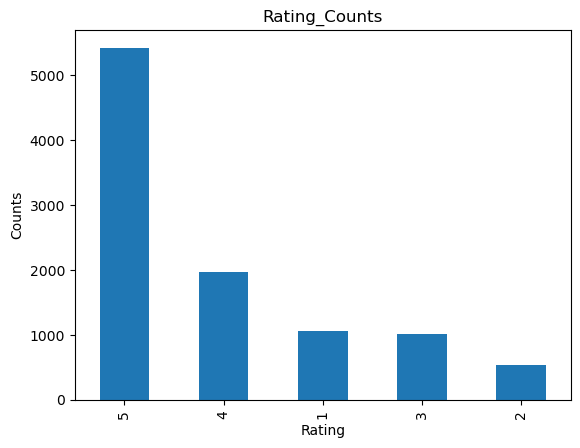

In [151]:
data['rating'].value_counts().plot.bar()
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Rating_Counts')
plt.show()

In [152]:
data['rating'].value_counts()

rating
5    5424
4    1967
1    1057
3    1009
2     542
Name: count, dtype: int64

In [153]:
data.shape

(9999, 9)

In [154]:
round(data['rating'].value_counts()/data.shape[0]*100,2) ##as a whole the frame gets multiplied

rating
5    54.25
4    19.67
1    10.57
3    10.09
2     5.42
Name: count, dtype: float64

In [155]:
data['text']

0       We used this airline to go from Singapore to L...
1       The service on Singapore Airlines Suites Class...
2       Booked, paid and received email confirmation f...
3       Best airline in the world, seats, food, servic...
4       Premium Economy Seating on Singapore Airlines ...
                              ...                        
9995    First part done with Singapore Airlines - acce...
9996    And again a great Flight with Singapore Air. G...
9997    We flew business class from Frankfurt, via Sin...
9998    As always, the A380 aircraft was spotlessly pr...
9999    As always, Singapore Airlines has done it agai...
Name: text, Length: 9999, dtype: object

<Axes: xlabel='published_platform'>

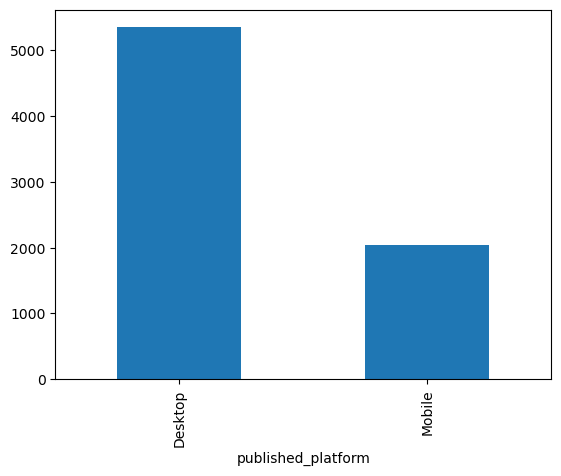

In [156]:
data[data['distribute']==1]['published_platform'].value_counts().plot.bar()

<Axes: xlabel='published_platform'>

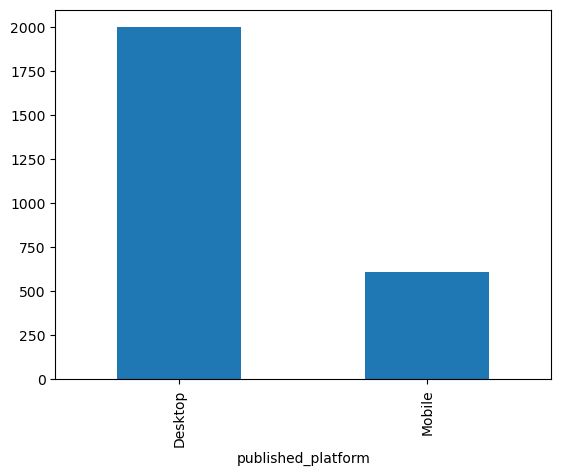

In [157]:
data[data['distribute']==0]['published_platform'].value_counts().plot.bar()

In [158]:
data.helpful_votes.value_counts()

helpful_votes
1      3492
0      3091
2      2481
3       564
4       190
5        77
6        38
7        17
8        10
9         8
10        7
12        4
27        3
11        3
21        2
29        1
17        1
56        1
43        1
41        1
35        1
90        1
158       1
61        1
25        1
108       1
24        1
Name: count, dtype: int64

<Axes: xlabel='rating'>

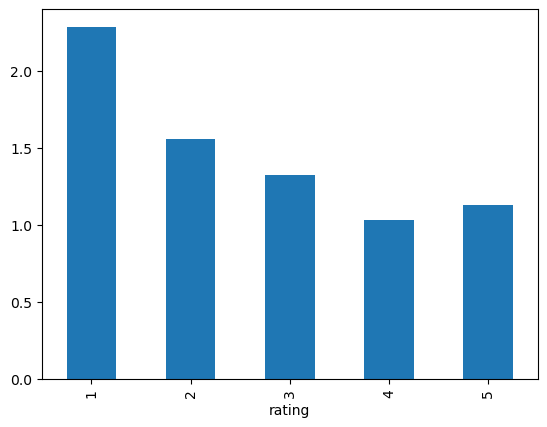

In [159]:
data.groupby('rating')['helpful_votes'].mean().plot.bar()
##5 star are getting more helpful votes

In [160]:
data['helpful_votes'].value_counts().sort_values()#.plot.bar()

helpful_votes
24        1
25        1
61        1
158       1
90        1
35        1
41        1
43        1
56        1
17        1
29        1
108       1
21        2
11        3
27        3
12        4
10        7
9         8
8        10
7        17
6        38
5        77
4       190
3       564
2      2481
0      3091
1      3492
Name: count, dtype: int64

<Axes: xlabel='rating'>

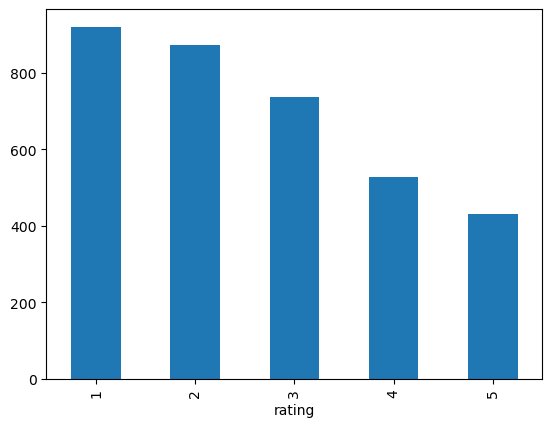

In [161]:
data.groupby('rating')['length'].mean().plot.bar()

In [162]:
##detailed reviw if bad 

In [163]:
cv=CountVectorizer(stop_words='english')##convert text to vecotr
words=cv.fit_transform(data.text)
title=cv.fit_transform(data.title)

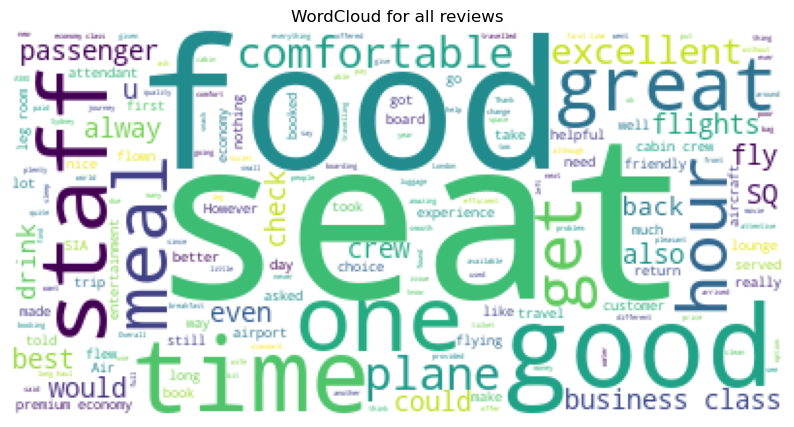

In [164]:
###TEXT REVIEWS OVERALL
reviews=" ".join([review for review in data['text']])
wc=WordCloud(background_color='white',stopwords=STOPWORDS)#, max_words=80)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud for all reviews')
plt.axis('off')
plt.show()

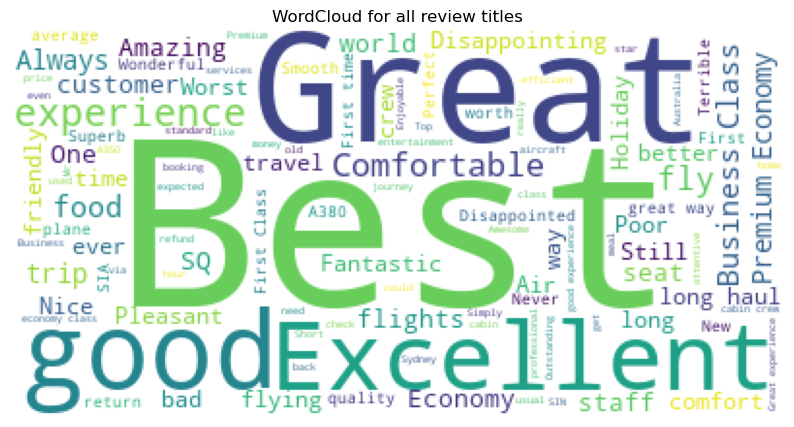

In [165]:
###TITLE OF REVIEWS OVERALL
review_titles=" ".join([review for review in data['title']])
wc=WordCloud(background_color='white',stopwords=STOPWORDS)#, max_words=80)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(review_titles))
plt.title('WordCloud for all review titles')
plt.axis('off')
plt.show()

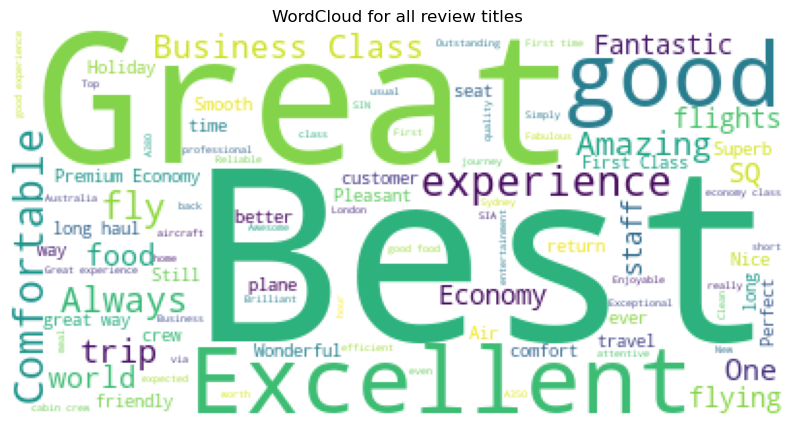

In [166]:
###POSITIVE TTITLE REVIEWS
POS=data[data['distribute']==1]
review_titles=" ".join([review for review in POS['title']])
wc=WordCloud(background_color='white',stopwords=STOPWORDS)#, max_words=80)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(review_titles))
plt.title('WordCloud for all review titles')
plt.axis('off')
plt.show()

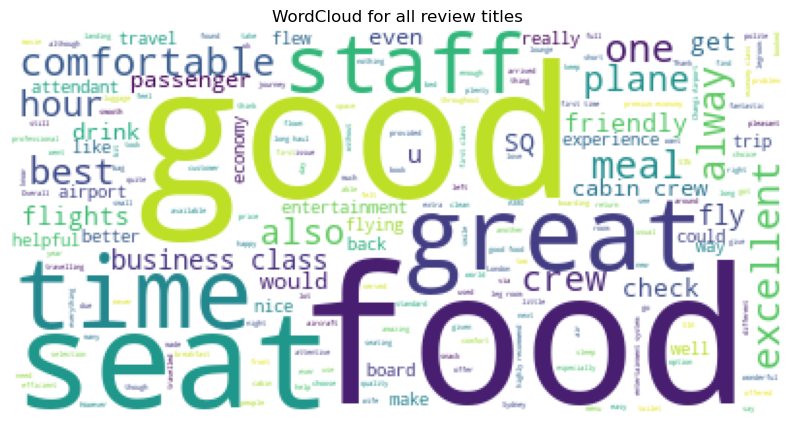

In [167]:
###POSITIVE TEXT REVIEWS
POS=data[data['distribute']==1]
review_titles=" ".join([review for review in POS['text']])
wc=WordCloud(background_color='white',stopwords=STOPWORDS)#, max_words=80)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(review_titles))
plt.title('WordCloud for all review titles')
plt.axis('off')
plt.show()

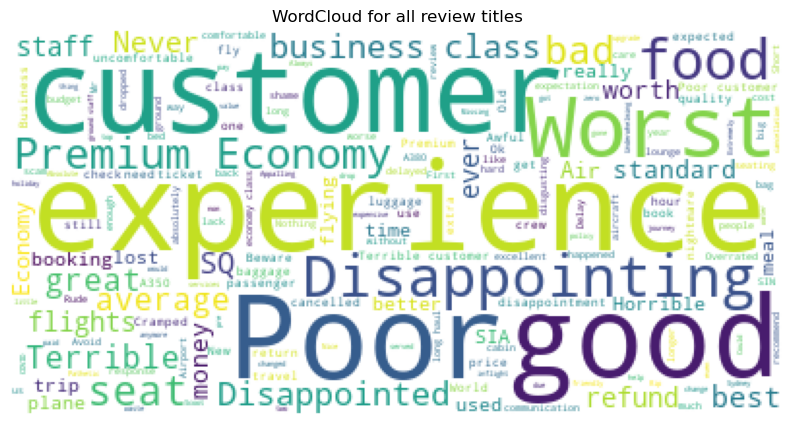

In [169]:
###NEGATIVE TITLE REVIEWS
NEG=data[data['distribute']==0]
review_titles=" ".join([review for review in NEG['title']])
wc=WordCloud(background_color='white',stopwords=STOPWORDS)#, max_words=80)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(review_titles))
plt.title('WordCloud for all review titles')
plt.axis('off')
plt.show()

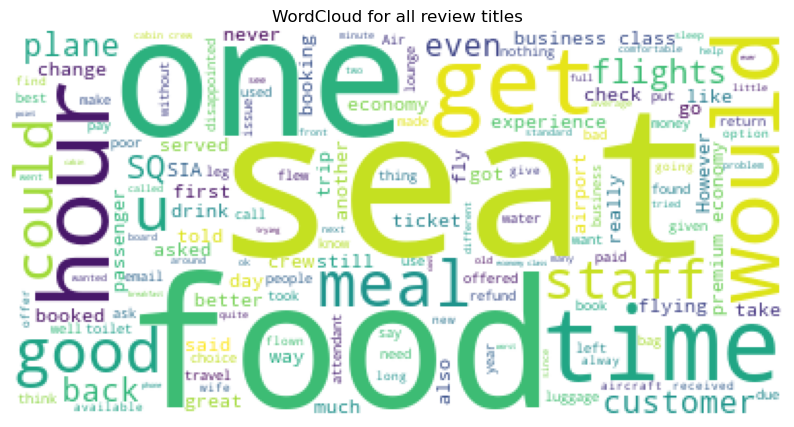

In [171]:
###NEGATIVE TEXT REVIEWS
NEG=data[data['distribute']==0]
review_titles=" ".join([review for review in NEG['text']])
wc=WordCloud(background_color='white',stopwords=STOPWORDS)#, max_words=80)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(review_titles))
plt.title('WordCloud for all review titles')
plt.axis('off')
plt.show()

STOPWORDS.update(['flight','singapore','airlines','service'])

STOPWORDS

In [130]:
###if stop word remove else convert porterstemmer    

In [174]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0,data.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',data.iloc[i]['title'])
    review=review.lower().split()
    review=[stemmer.stem(word) for word in review if not word in STOPWORDS]
    review=''.join(review)
    corpus.append(review)

In [175]:
corpus

['ok',
 'suitclassmakeonefeellikevip',
 'givemoney',
 'bestworld',
 'premiumeconomiseatworthmoney',
 'impossgetpromisrefund',
 'woahflisq',
 'longqcheck',
 'baddisappoint',
 'givemiss',
 'disappoint',
 'worstexperilife',
 'happen',
 'bewarbewarbewar',
 'never',
 'premiumeconomiripworthdiffer',
 'missbaggagcustom',
 'comfortpunctualhotmeal',
 'nothspecial',
 'botherpremiumeconomi',
 'travelsickparent',
 'kingscamfalspromis',
 'beststaffever',
 'underwhelmexperipremiumeconomi',
 'goodcustom',
 'greatanymor',
 'aw',
 'happiair',
 'firstclassfood',
 'ohdear',
 'perfecthardkeep',
 'bestbusiclassseat',
 'book',
 'aw',
 'disappointexperisq',
 'poorpremiumeconomiexperinever',
 'feedbackcomplainhotlinsuck',
 'enormdisappoint',
 'amazexperi',
 'firstworstmakegreyhoundbuseemcomfit',
 'good',
 'nothpremiumpremiumeconomi',
 'aweexperi',
 'happen',
 'improvduh',
 'upgradpremiumeconomi',
 'topnotch',
 'greatterriblaircraft',
 'busiclassseatuncomfortseatever',
 'patientprofession',
 'lookanoth',
 'cho

In [188]:
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()
y=data['distribute'].values

In [189]:
x.shape

(9999, 2500)

In [190]:
#pickle.dump(cv,open('Models/countVectorizer.pkl','wb'))

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

In [192]:
x_train[0].shape

(2500,)

In [199]:
scaler=MinMaxScaler()
x_train_scl=scaler.fit_transform(x_train)
x_test_scl=scaler.fit_transform(x_test)

In [201]:
x_train_scl.max()

1.0

In [203]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train_scl,y_train)

RandomForestClassifier()

In [205]:
model_rf.score(x_test_scl,y_test)

0.773

In [206]:
model_rf.score(x_train_scl,y_train)

0.858979854264895

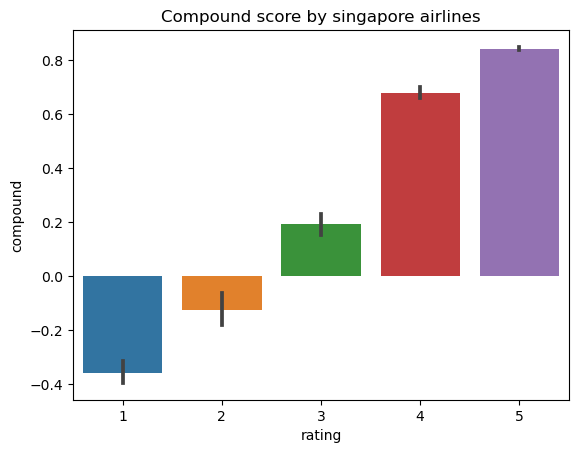

In [64]:
###PLOT VADER RESULTS
ax=sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compound score by singapore airlines')
plt.show()

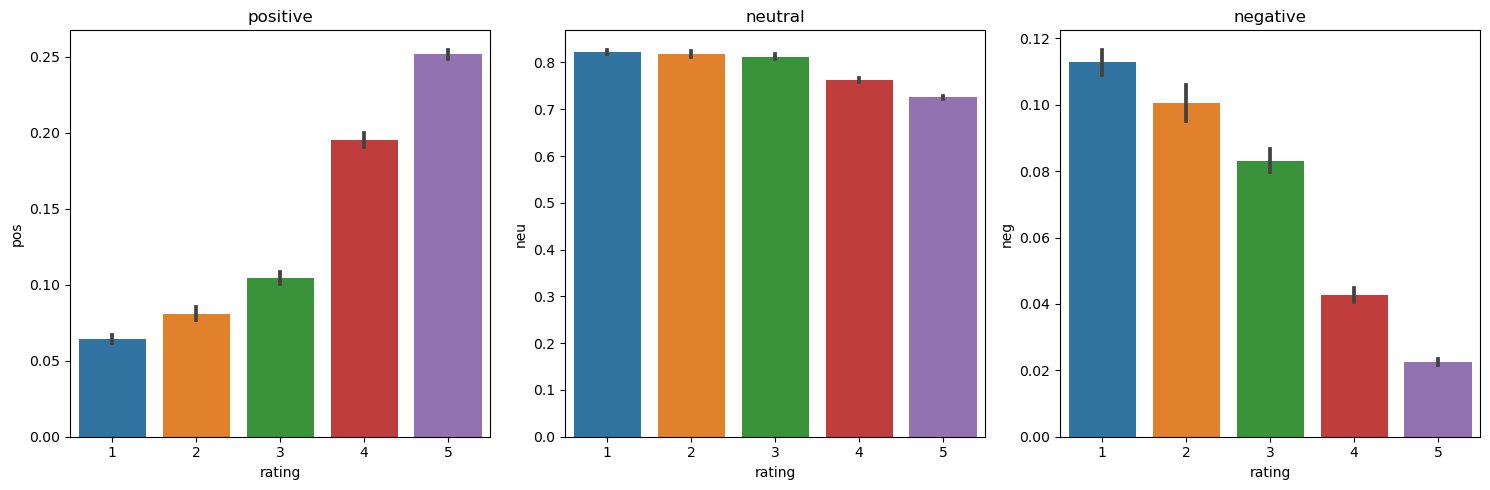

In [73]:
###PLOT VADER RESULTS
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='rating', y='pos',ax=ax[0])
sns.barplot(data=vaders, x='rating', y='neu',ax=ax[1])
sns.barplot(data=vaders, x='rating', y='neg',ax=ax[2])
ax[0].set_title('positive')
ax[1].set_title('neutral')
ax[2].set_title('negative')
plt.tight_layout()
plt.show()

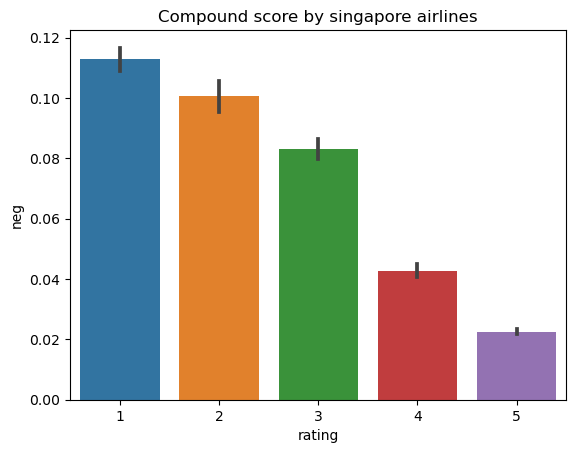

In [66]:
###PLOT VADER RESULTS
ax=sns.barplot(data=vaders, x='rating', y='neg')
ax.set_title('Compound score by singapore airlines')
plt.show()

In [76]:
!pip install transformers
from transformers import Auto

  Using cached transformers-4.43.3-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.24.5-py3-none-any.whl.metadata (13 kB)
  Using cached safetensors-0.4.3-cp311-none-win_amd64.whl.metadata (3.9 kB)
  Using cached tokenizers-0.19.1-cp311-none-win_amd64.whl.metadata (6.9 kB)
Using cached transformers-4.43.3-py3-none-any.whl (9.4 MB)
Using cached huggingface_hub-0.24.5-py3-none-any.whl (417 kB)
Using cached safetensors-0.4.3-cp311-none-win_amd64.whl (287 kB)
Using cached tokenizers-0.19.1-cp311-none-win_amd64.whl (2.2 MB)


ImportError: cannot import name 'Auto' from 'transformers' (C:\Users\Shraddha\.anaconda\anaconda-navigator\Lib\site-packages\transformers\__init__.py)

In [79]:
#!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [82]:
import os
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'
!set HF_HUB_DISABLE_SYMLINKS_WARNING=1
MODEL=f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [83]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [85]:
encoded_text=tokenizer(example, return_tensors='pt')

In [90]:
output=model(**encoded_text)

In [91]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7440,  0.1104, -1.8865]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [87]:
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores

array([0.8185053 , 0.15980104, 0.0216936 ], dtype=float32)

In [88]:
scores_dict={'neg':scores[0], 'neu': scores[1], 'pos':scores[2]}

In [89]:
print(scores_dict)

{'neg': 0.8185053, 'neu': 0.15980104, 'pos': 0.0216936}


In [95]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example, return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={'neg':scores[0], 'neu': scores[1], 'pos':scores[2]}
    return scores_dict
    
    
    
    

In [113]:
res={}
for i,row in (data.iterrows()):
    try:
        text=row['text']
        myid=i
        vader_result=sia.polarity_scores(text)
        vader_result_rename={}
        for key,value in vader_result.items():
            vader_result_rename[f'vader_{key}']=value
        roberta_result=polarity_scores_roberta(text)
        both={**vader_result,**roberta_result}
        res[myid]=both
    except RuntimeError:
        print(f'broke for id{myid}')
    

broke for id1
broke for id11
broke for id36
broke for id42
broke for id59
broke for id122
broke for id153
broke for id187
broke for id198
broke for id207
broke for id209
broke for id210
broke for id216
broke for id236
broke for id240
broke for id250
broke for id285
broke for id305
broke for id321
broke for id356
broke for id364
broke for id376
broke for id420
broke for id421
broke for id437
broke for id461
broke for id475
broke for id489
broke for id515
broke for id539
broke for id540
broke for id590
broke for id592
broke for id603
broke for id635
broke for id669
broke for id686
broke for id714
broke for id735
broke for id757
broke for id774
broke for id776
broke for id791
broke for id799
broke for id812
broke for id838
broke for id839
broke for id852
broke for id874
broke for id887
broke for id893
broke for id922


IndexError: index out of range in self

In [107]:
roberta_result

{'neg': 0.19508757, 'neu': 0.41383013, 'pos': 0.3910823}

In [108]:
vader_result

{'neg': 0.019, 'neu': 0.871, 'pos': 0.109, 'compound': 0.9781}

In [109]:
both

{'neg': 0.19508757, 'neu': 0.41383013, 'pos': 0.3910823, 'compound': 0.9781}

In [110]:
res

{0: {'neg': 0.19508757,
  'neu': 0.41383013,
  'pos': 0.3910823,
  'compound': 0.9781}}

In [124]:
results_df=pd.DataFrame(res).T
results_df.index.name=('id')
results_df=results_df.merge(data,how='left',left_index=True, right_index=True)

In [125]:
results_df

,neg,neu,pos,compound,published_date,published_platform,rating,type,text,title,helpful_votes,length
id,,,,,,,,,,,,
0,0.195088,0.413830,0.391082,0.9781,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,1352
2,0.904514,0.085555,0.009931,0.4588,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,420
3,0.001752,0.006744,0.991504,0.9601,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,144
4,0.872803,0.112543,0.014654,-0.7177,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,582
5,0.818505,0.159801,0.021694,-0.6445,2024-03-10T01:16:48-05:00,Desktop,1,review,We booked our flights a full 9 months in advan...,Impossible to get a promised refund,0,812
...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.902503,0.088494,0.009003,-0.9152,2022-07-04T05:02:21-04:00,Desktop,1,review,I booked redemption ticket on Booking Ref Numb...,Left passenger stranded with no help,1,929
953,0.867187,0.122814,0.009999,0.8971,2022-07-03T20:54:14-04:00,Desktop,1,review,While booking tickets for my in law's (Mumbai ...,Unpleasant experience with the airline website...,1,995
954,0.656982,0.293613,0.049406,0.7102,2022-07-03T18:47:31-04:00,Desktop,2,review,Very disappointed with the communication and s...,Miss,1,729


<Axes: xlabel='rating'>

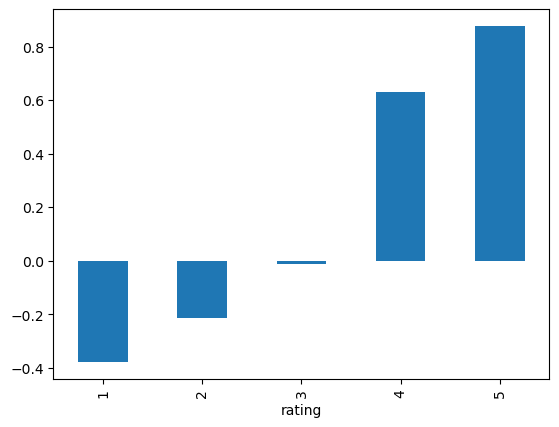

In [133]:
results_df.groupby('rating')['compound'].mean().plot(kind='bar')##works well

In [154]:
results_df.query('rating==5').sort_values('compound',ascending=True)['title'].values[8]

'Good expereince Singapore to Sydney and Return'

In [160]:
from transformers import pipeline
sent_pipeline=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [159]:
!pip install keras 


In [161]:
results_df

,neg,neu,pos,compound,published_date,published_platform,rating,type,text,title,helpful_votes,length
id,,,,,,,,,,,,
0,0.195088,0.413830,0.391082,0.9781,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,1352
2,0.904514,0.085555,0.009931,0.4588,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,420
3,0.001752,0.006744,0.991504,0.9601,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,144
4,0.872803,0.112543,0.014654,-0.7177,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,582
5,0.818505,0.159801,0.021694,-0.6445,2024-03-10T01:16:48-05:00,Desktop,1,review,We booked our flights a full 9 months in advan...,Impossible to get a promised refund,0,812
...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.902503,0.088494,0.009003,-0.9152,2022-07-04T05:02:21-04:00,Desktop,1,review,I booked redemption ticket on Booking Ref Numb...,Left passenger stranded with no help,1,929
953,0.867187,0.122814,0.009999,0.8971,2022-07-03T20:54:14-04:00,Desktop,1,review,While booking tickets for my in law's (Mumbai ...,Unpleasant experience with the airline website...,1,995
954,0.656982,0.293613,0.049406,0.7102,2022-07-03T18:47:31-04:00,Desktop,2,review,Very disappointed with the communication and s...,Miss,1,729


In [ ]:
###assuming a case with 
results_df[results_df['